In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from adjustText import adjust_text

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Factor analysis
import prince


In [2]:
# Load the dataset
data = pd.read_csv('migraine_symptom_classification.csv')
print(data.shape)
print(data.head())

(400, 24)
   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF           

In [3]:
cat_cols = [
    "Location", "Character", "Intensity", "Nausea", "Vomit", "Phonophobia",
    "Photophobia", "Visual", "Sensory", "Dysphasia", "Dysarthria", "Vertigo",
    "Tinnitus", "Hypoacusis", "Diplopia", "Defect", "Ataxia", "Conscience",
    "Paresthesia", "DPF", "Type"
]

# Convert specified columns to categorical
for col in cat_cols:
    data[col] = data[col].astype('category')

In [4]:
# Check for duplicated rows
has_duplicates = data.duplicated().any()
num_duplicates = data.duplicated().sum()
print(f"Has duplicated rows: {has_duplicates}")
print(f"Number of duplicated rows: {num_duplicates}")


Has duplicated rows: True
Number of duplicated rows: 6


In [5]:
# Drop duplicated rows
data = data.drop_duplicates()
print(f"Number of duplicated rows: {data.duplicated().sum()}")

print(data.shape)

Number of duplicated rows: 0
(394, 24)


In [6]:
# Check for missing values
num_missing = data.isnull().sum().sum()
print(f"Total missing values: {num_missing}")


Total missing values: 0


In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['Type'], random_state=123)

In [8]:
print(train_data.shape)

(315, 24)


In [9]:
# Summary for numeric and categorical columns
summary = train_data.describe(include='all').T

# Display category value counts 
cat_summary = {}
for col in cat_cols:
    cat_summary[col] = train_data[col].value_counts().sort_index()

# Display numeric summary
print("\nNumerical Summary:\n")
print(train_data.describe())

# Display categorical summaries 
print("\nCategorical Variable Summaries:\n")
for col, counts in cat_summary.items():
    print(f"\n{col}:")
    print(counts)


Numerical Summary:

              Age    Duration   Frequency
count  315.000000  315.000000  315.000000
mean    31.619048    1.603175    2.342857
std     12.229010    0.764242    1.693911
min     15.000000    1.000000    1.000000
25%     22.000000    1.000000    1.000000
50%     28.000000    1.000000    2.000000
75%     40.000000    2.000000    3.000000
max     77.000000    3.000000    8.000000

Categorical Variable Summaries:


Location:
Location
0     16
1    292
2      7
Name: count, dtype: int64

Character:
Character
0     16
1    289
2     10
Name: count, dtype: int64

Intensity:
Intensity
0     16
1      7
2    110
3    182
Name: count, dtype: int64

Nausea:
Nausea
0      4
1    311
Name: count, dtype: int64

Vomit:
Vomit
0    214
1    101
Name: count, dtype: int64

Phonophobia:
Phonophobia
0      8
1    307
Name: count, dtype: int64

Photophobia:
Photophobia
0      7
1    308
Name: count, dtype: int64

Visual:
Visual
0     67
1     74
2    137
3     30
4      7
Name: count, dty

In [10]:
print(train_data.head())

     Age  Duration  Frequency Location Character Intensity Nausea Vomit  \
267   34         2          1        1         1         3      1     1   
39    41         3          7        1         1         3      1     1   
318   23         2          1        1         1         2      1     1   
194   25         2          1        1         1         2      1     0   
342   19         1          2        1         1         2      1     1   

    Phonophobia Photophobia  ... Vertigo Tinnitus Hypoacusis Diplopia Defect  \
267           1           1  ...       0        0          0        0      0   
39            1           1  ...       0        0          0        0      0   
318           1           1  ...       0        0          0        0      0   
194           1           1  ...       0        0          0        0      0   
342           1           1  ...       1        0          0        0      0   

    Ataxia Conscience Paresthesia DPF                          Type 

In [11]:
# Drop the response variable
X = train_data.drop(columns=['Type'])
print(X.head())

     Age  Duration  Frequency Location Character Intensity Nausea Vomit  \
267   34         2          1        1         1         3      1     1   
39    41         3          7        1         1         3      1     1   
318   23         2          1        1         1         2      1     1   
194   25         2          1        1         1         2      1     0   
342   19         1          2        1         1         2      1     1   

    Phonophobia Photophobia  ... Dysarthria Vertigo Tinnitus Hypoacusis  \
267           1           1  ...          0       0        0          0   
39            1           1  ...          0       0        0          0   
318           1           1  ...          0       0        0          0   
194           1           1  ...          0       0        0          0   
342           1           1  ...          0       1        0          0   

    Diplopia Defect Ataxia Conscience Paresthesia DPF  
267        0      0      0          0     

In [12]:
X['Age'] = X['Age'].astype(float)
X['Duration'] = X['Duration'].astype(float)
X['Frequency'] = X['Frequency'].astype(float)

In [13]:
print(X.dtypes)

Age             float64
Duration        float64
Frequency       float64
Location       category
Character      category
Intensity      category
Nausea         category
Vomit          category
Phonophobia    category
Photophobia    category
Visual         category
Sensory        category
Dysphasia      category
Dysarthria     category
Vertigo        category
Tinnitus       category
Hypoacusis     category
Diplopia       category
Defect         category
Ataxia         category
Conscience     category
Paresthesia    category
DPF            category
dtype: object


In [14]:
# Fit FAMD
famd = prince.FAMD(n_components=10, random_state=42)
famd = famd.fit(X)

famd_coords = famd.transform(X)
print("\nTransformed data (FAMD coordinates) head:")
print(famd_coords.head())



Transformed data (FAMD coordinates) head:
component         0         1         2         3         4         5  \
267       -2.432253 -0.543431 -2.915366  4.064599  6.115574  0.529525   
39        -1.753311  0.070027 -1.981151  3.218468  5.475272  2.594826   
318        0.849967 -2.043712 -2.164034  1.523705  0.078078 -1.688226   
194       -1.423499 -1.147677 -0.260199 -1.205345 -4.339831 -0.986621   
342        1.050612 -1.338631  2.462255 -2.056194 -0.926545 -2.465427   

component         6         7         8         9  
267       -1.383672 -0.071785  1.506973  0.932167  
39        -1.968652 -0.523403  0.917948  1.707703  
318        2.870836 -0.268708  3.403355  1.972357  
194       -0.277264  0.194982 -2.511072 -3.069822  
342        4.858547 -0.209575  4.790744  0.013103  


In [15]:
eigenvalues = famd.eigenvalues_
explained_inertia = eigenvalues / eigenvalues.sum()

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_inertia)


Eigenvalues: [35.86356637 31.52015372 21.4058953  16.3631694  15.04285362 12.99992688
 12.63098238 11.745747   11.15496282 10.95177203]
Explained Variance Ratio: [0.19959795 0.17542478 0.11913408 0.09106889 0.0837207  0.07235083
 0.07029748 0.06537072 0.06208272 0.06095187]


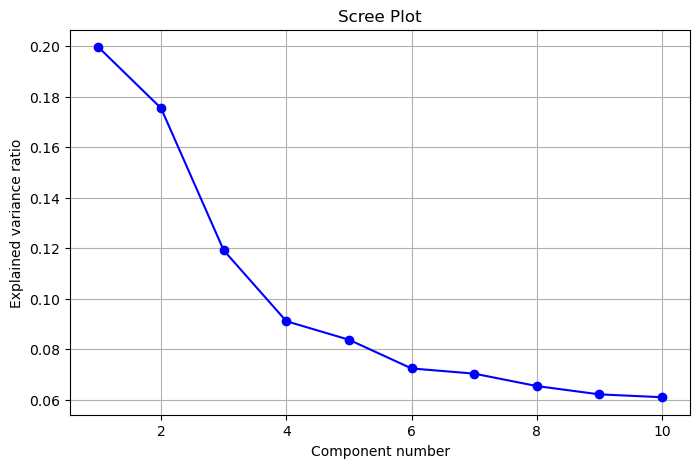

In [16]:
# Scree plot 
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), explained_inertia, 'o-', color='blue')
plt.xlabel('Component number')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Elbow point seem to be at 3

In [17]:
row_coords = famd.row_coordinates(X)
var_contrib = famd.column_contributions_
col_coords = famd.column_coordinates_

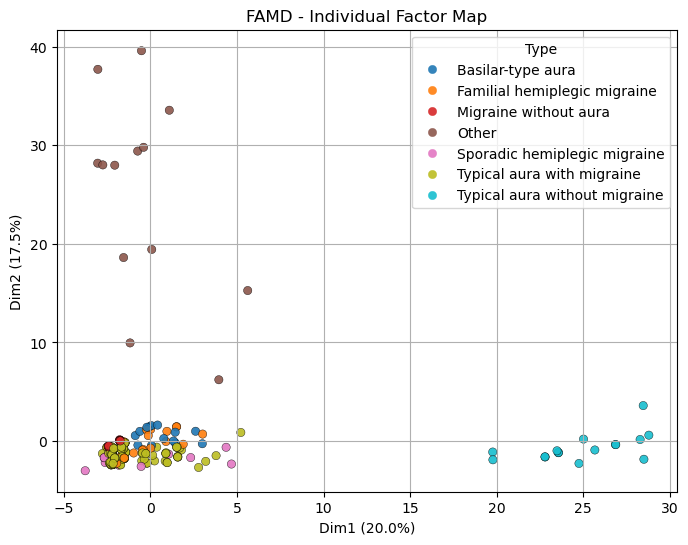

In [18]:
# Plot the Individual Factor Map plot
type_labels = LabelEncoder().fit(train_data['Type'])
encoded_types = type_labels.transform(train_data['Type'])
class_names = type_labels.classes_

plt.figure(figsize=(8, 6))

scatter = plt.scatter(famd_coords[0], famd_coords[1], 
                      c=encoded_types, cmap='tab10',  
                      alpha=0.9, edgecolors='black', linewidths=0.3)

plt.xlabel(f"Dim1 ({explained_inertia[0]*100:.1f}%)")
plt.ylabel(f"Dim2 ({explained_inertia[1]*100:.1f}%)")
plt.title("FAMD - Individual Factor Map")
plt.grid(True)

handles, _ = scatter.legend_elements()
plt.legend(handles, class_names, title="Type", loc='best')

plt.show()


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


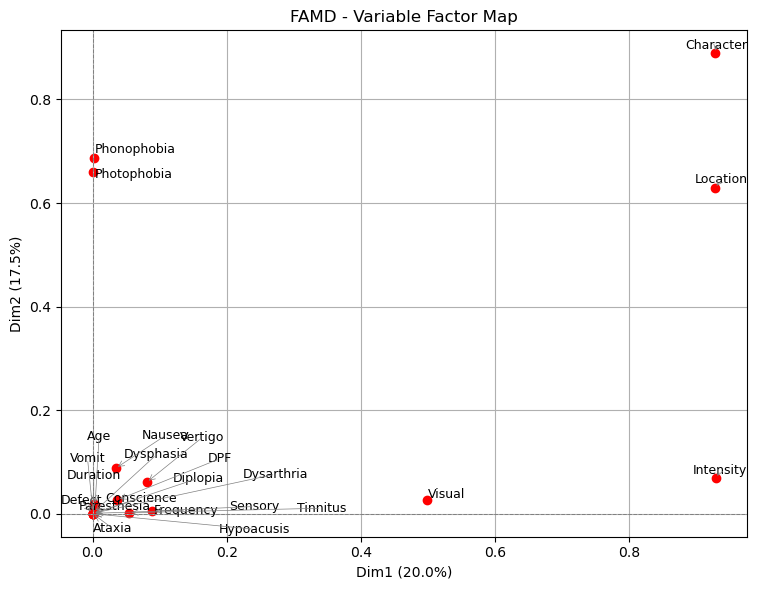

In [19]:
# Plot the Variable factor map plot
plt.figure(figsize=(8, 6))
plt.scatter(col_coords[0], col_coords[1], color='red')

texts = []
for i, txt in enumerate(col_coords.index):
    # Create text objects at the original points
    texts.append(plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, fontsize=9, color='black'))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

plt.xlabel(f"Dim1 ({explained_inertia[0]*100:.1f}%)")
plt.ylabel(f"Dim2 ({explained_inertia[1]*100:.1f}%)")
plt.title("FAMD - Variable Factor Map")
plt.grid(True)
plt.tight_layout()

adjust_text(texts, 
            only_move={'points':'y', 'texts':'y'},  # Move only vertically (optional)
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.2, 1.2),
            expand_text=(1.2, 1.2),
            force_text=0.5,
            force_points=0.5
           )

plt.show()


In [20]:
# K-Means clustering
pd.set_option('display.max_columns', None)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(row_coords[[0, 1]])  

X['cluster'] = clusters
numeric_cols = X.select_dtypes(include=['number']).columns.drop('cluster')
categorical_cols = X.select_dtypes(include=['category', 'object']).columns

# Numeric summary
numeric_summary = X.groupby('cluster')[numeric_cols].agg(['mean', 'median', 'count'])

# Categorical summary 
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else pd.NA

categorical_summary = X.groupby('cluster')[categorical_cols].agg(mode)

print("Numeric summary per cluster:")
print(numeric_summary)

print("\nCategorical mode per cluster:")
print(categorical_summary)


Numeric summary per cluster:
               Age               Duration              Frequency             
              mean median count      mean median count      mean median count
cluster                                                                      
0        31.531250   28.0   288  1.586806    1.0   288  2.333333    2.0   288
1        27.500000   24.5    16  1.625000    1.0    16  2.875000    2.0    16
2        39.909091   40.0    11  2.000000    2.0    11  1.818182    1.0    11

Categorical mode per cluster:
        Location Character Intensity Nausea Vomit Phonophobia Photophobia  \
cluster                                                                     
0              1         1         3      1     0           1           1   
1              0         0         0      1     0           1           1   
2              2         2         3      1     0           0           0   

        Visual Sensory Dysphasia Dysarthria Vertigo Tinnitus Hypoacusis  \
cluster    

C:\Users\Vayani Kavindya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


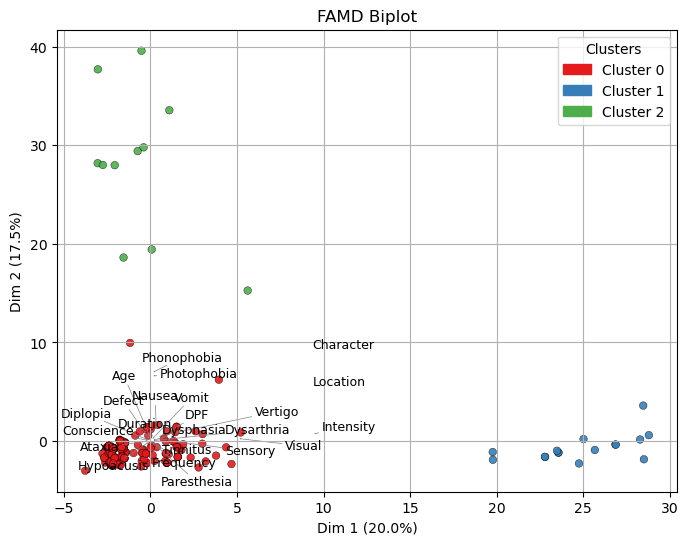

In [21]:
# Plot the FAMD Biplot
cluster_colors = {0: '#e41a1c', 1: '#377eb8', 2: '#4daf4a'}  # red, blue, green
colors = X['cluster'].map(cluster_colors)

plt.figure(figsize=(8,6))
scatter = plt.scatter(row_coords[0], row_coords[1], c=colors, s=30, alpha=0.9, edgecolors='black', linewidths=0.3)

texts = []
for i in range(col_coords.shape[0]):
    texts.append(plt.text(col_coords.iloc[i, 0]*10, col_coords.iloc[i, 1]*10,
                          col_coords.index[i], color='black', fontsize=9))

plt.xlabel(f'Dim 1 ({explained_inertia[0]*100:.1f}%)')
plt.ylabel(f'Dim 2 ({explained_inertia[1]*100:.1f}%)')
plt.title('FAMD Biplot')
plt.grid(True)

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

legend_elements = [Patch(color=color, label=f'Cluster {i}') for i, color in cluster_colors.items()]
plt.legend(handles=legend_elements, title='Clusters', loc='best')

plt.show()


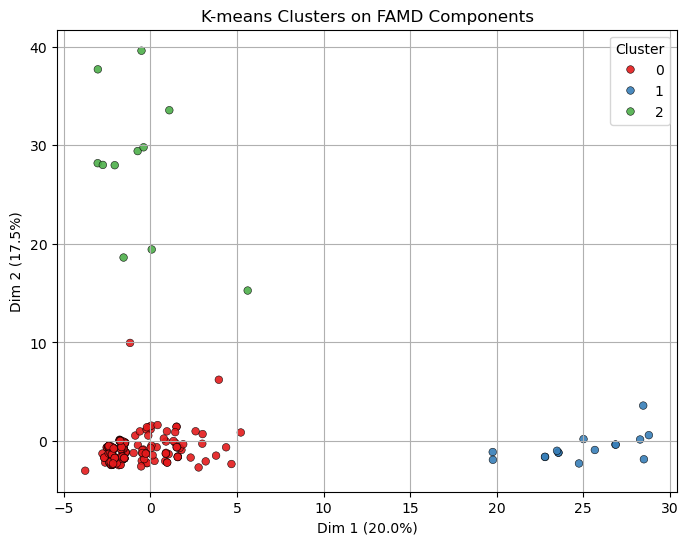

In [22]:
# Plot the K-Means clustering
explained_inertia = [0.2, 0.175]  

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=row_coords[0], y=row_coords[1],
    hue=clusters,
    palette=cluster_colors,
    s=30,
    edgecolor='black',
    linewidth=0.4,
    alpha=0.9
)
plt.xlabel(f'Dim 1 ({explained_inertia[0]*100:.1f}%)')
plt.ylabel(f'Dim 2 ({explained_inertia[1]*100:.1f}%)')
plt.title('K-means Clusters on FAMD Components')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



In [23]:
# Get the silhoutte score
score = silhouette_score(row_coords[[0, 1]], clusters, metric='euclidean')
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.908


In [24]:
# Summarize main dimensions
print("Top contributing variables to Dimension 1:")
print(var_contrib[0].sort_values(ascending=False).head(4))

print("\nTop contributing variables to Dimension 2:")
print(var_contrib[1].sort_values(ascending=False).head(4))

# Highlight patterns
print("\nCluster sizes:")
train_data = X.copy()  
print(train_data['cluster'].value_counts())


# Outliers 
outliers = train_data[(row_coords[0].abs() > 3) | (row_coords[1].abs() > 3)]
print(len(outliers))


Top contributing variables to Dimension 1:
variable
Intensity    0.025926
Location     0.025875
Character    0.025872
Visual       0.013893
Name: 0, dtype: float64

Top contributing variables to Dimension 2:
variable
Character      0.028207
Phonophobia    0.021807
Photophobia    0.020936
Location       0.019950
Name: 1, dtype: float64

Cluster sizes:
cluster
0    288
1     16
2     11
Name: count, dtype: int64
36
